In [93]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


In [94]:

#Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")

# Semilla para reproducibilidad
np.random.seed(42)

# Cargamos el dataset
data = pd.read_csv(r'C:\Users\flavi\OneDrive\Escritorio\Optimizacion\Lab2_superopti\dataset\Student_Performance.csv')
data.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [95]:
# 1. Descripción del dataset
# --------------------------

print("1. DESCRIPCIÓN DEL DATASET")
print("--------------------------")
print(f"Número de muestras: {data.shape[0]}")
print(f"Número de variables: {data.shape[1]}")
print("\nPrimeras 5 filas del dataset:")
print(data.head())

print("\nEstadísticas descriptivas básicas:")
print(data.describe())

print("\nInformación sobre tipos de datos:")
print(data.info())

print("\nVariables independientes (predictores):")
print("- Hours Studied: Horas dedicadas al estudio")
print("- Previous Scores: Calificaciones previas")
print("- Extracurricular Activities: Participación en actividades extracurriculares (categórica)")
print("- Sleep Hours: Horas de sueño")
print("- Sample Question Papers Practiced: Número de exámenes de práctica realizados")

print("\nVariable dependiente:")
print("- Performance Index: Índice de rendimiento académico")

print("\nValores únicos en Extracurricular Activities:")
print(data['Extracurricular Activities'].unique())

# Verificamos si hay valores nulos
print("\nValores nulos en el dataset:")
print(data.isnull().sum())


1. DESCRIPCIÓN DEL DATASET
--------------------------
Número de muestras: 10000
Número de variables: 6

Primeras 5 filas del dataset:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Estadísticas descriptivas básicas:
       Hours Studied  Pre



2. RELACIÓN ENTRE CARACTERÍSTICAS SELECCIONADAS Y VARIABLE DE SALIDA
-------------------------------------------------------------------

Creando scatter matrix para visualizar relaciones entre variables...


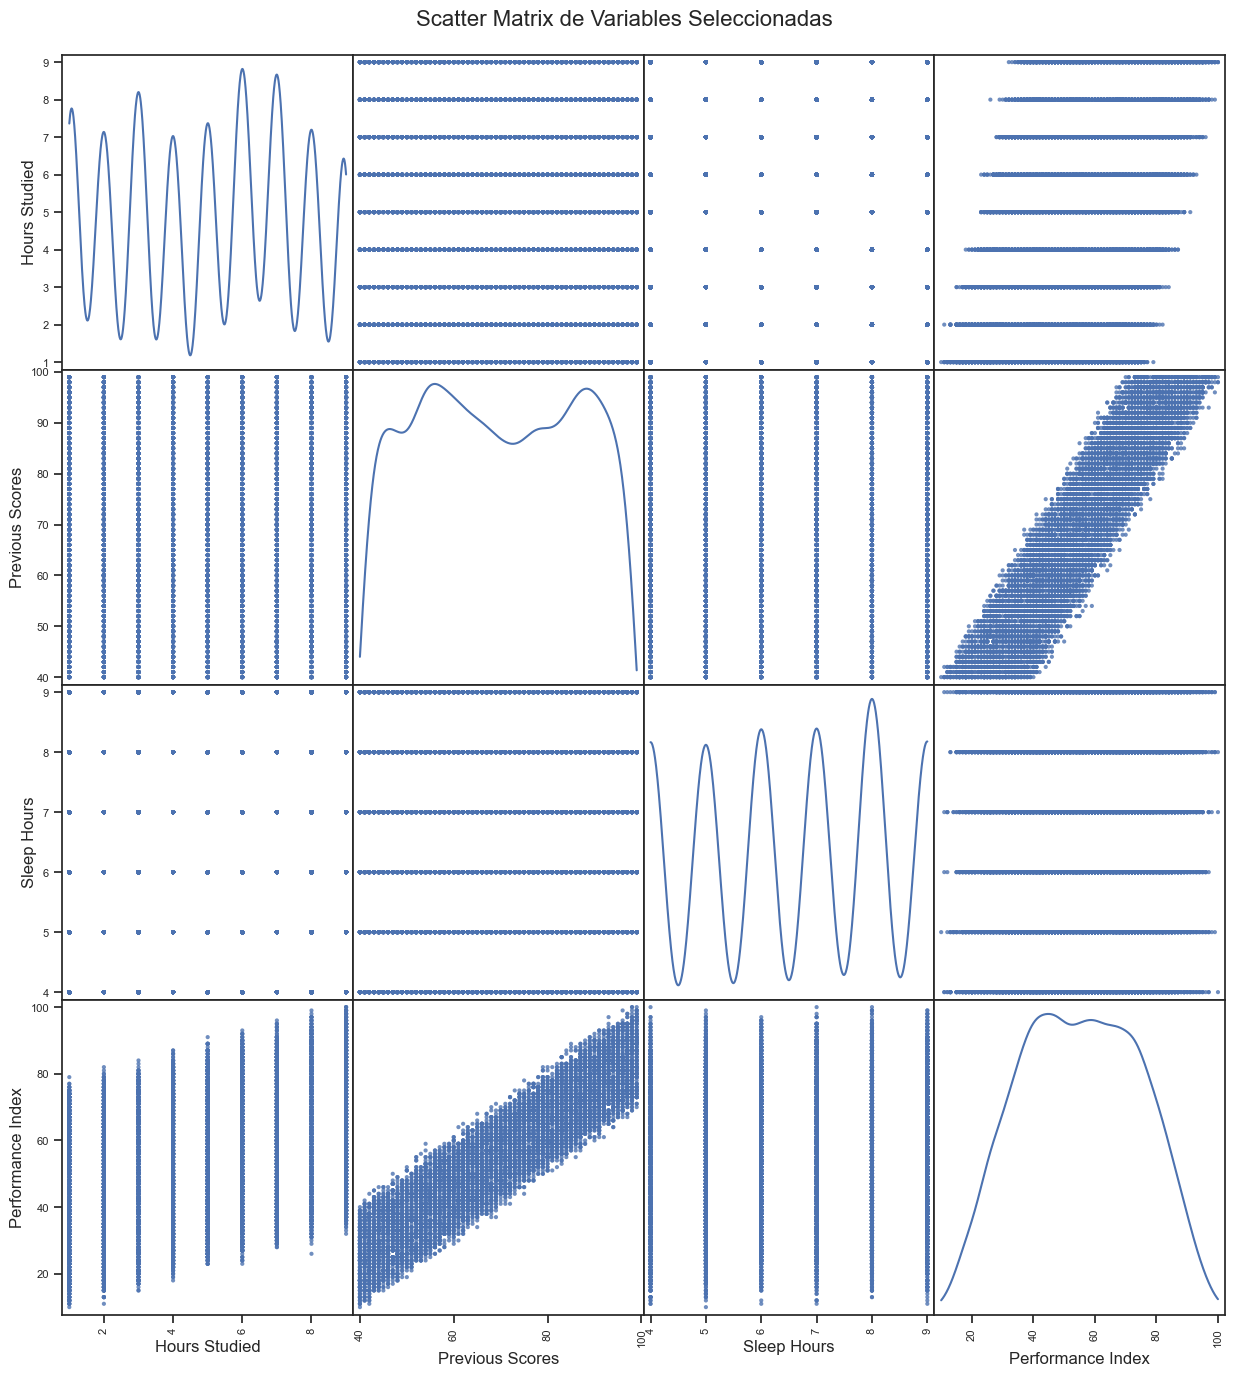

In [96]:
# 2. Relación entre características seleccionadas y variable de salida
# -------------------------------------------------------------------

print("\n\n2. RELACIÓN ENTRE CARACTERÍSTICAS SELECCIONADAS Y VARIABLE DE SALIDA")
print("-------------------------------------------------------------------")

# Seleccionamos las tres características numéricas para el análisis
features_to_analyze = ['Hours Studied', 'Previous Scores', 'Sleep Hours']
selected_features = features_to_analyze + ['Performance Index']

# Creamos scatter matrix para visualizar relaciones
print("\nCreando scatter matrix para visualizar relaciones entre variables...")
sns.set_theme(style="ticks")
scatter_matrix = pd.plotting.scatter_matrix(data[selected_features], figsize=(15, 15), 
                                           diagonal='kde', alpha=0.8)
plt .suptitle('Scatter Matrix de Variables Seleccionadas', fontsize=16)
plt.subplots_adjust(top=0.95)  # Ajustamos el título
plt.savefig('images//scatter_matrix.png')
plt.show()
plt.close()

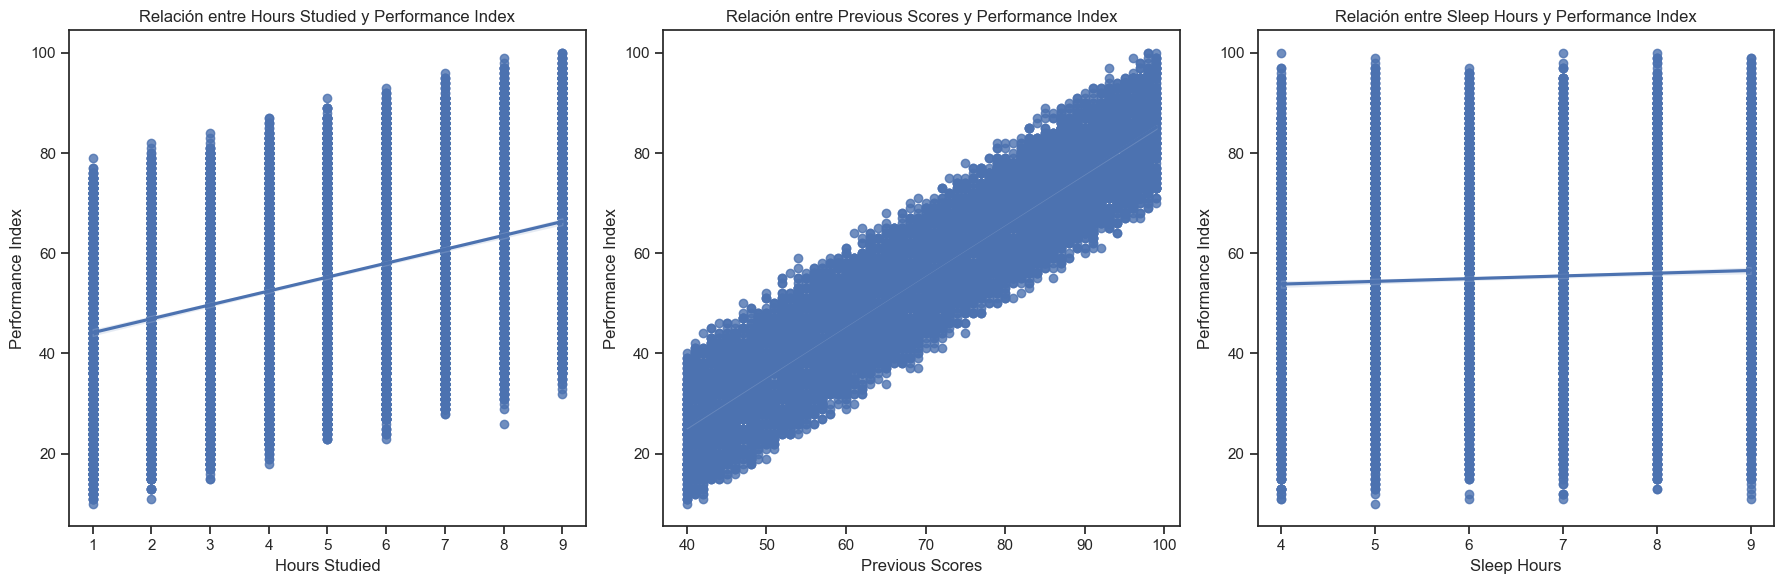

In [97]:

# Visualizamos la relación de cada característica con la variable dependiente
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, feature in enumerate(features_to_analyze):
    sns.regplot(x=feature, y='Performance Index', data=data, ax=axes[i])
    axes[i].set_title(f'Relación entre {feature} y Performance Index')
plt.tight_layout()
plt.savefig('images//feature_relationships.png')
plt.show()
plt.close()

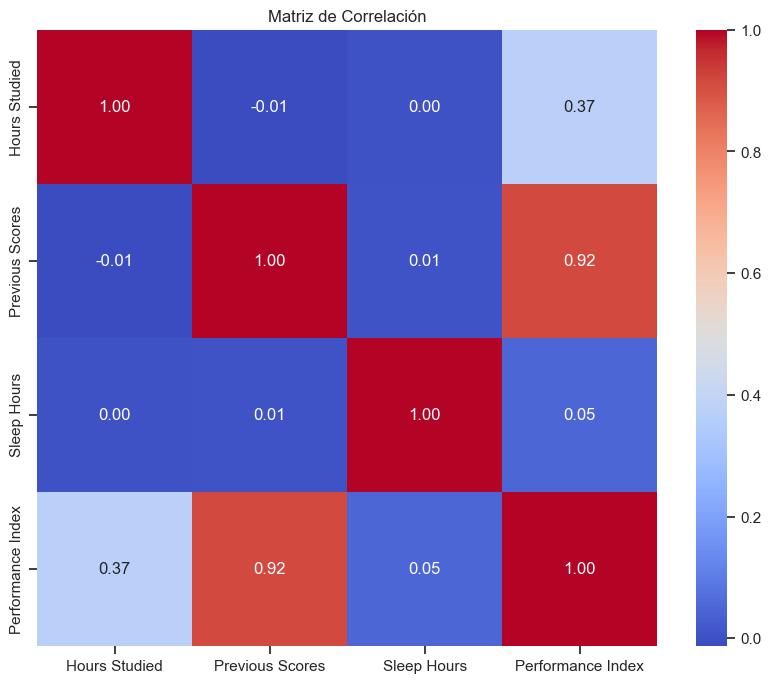

In [98]:

# Analizamos correlaciones
correlation_matrix = data[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.savefig('images//correlation_matrix.png')
plt.show()
plt.close()


Matriz de correlación:
                   Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied           1.000000        -0.012390     0.001245   
Previous Scores        -0.012390         1.000000     0.005944   
Sleep Hours             0.001245         0.005944     1.000000   
Performance Index       0.373730         0.915189     0.048106   

                   Performance Index  
Hours Studied               0.373730  
Previous Scores             0.915189  
Sleep Hours                 0.048106  
Performance Index           1.000000  

Interpretación de las relaciones observadas:
- Hours Studied vs. Performance Index: Muestra la relación entre el tiempo de estudio y el rendimiento.
- Previous Scores vs. Performance Index: Indica cómo las calificaciones anteriores predicen el rendimiento actual.
- Sleep Hours vs. Performance Index: Refleja el impacto de las horas de sueño en el rendimiento académico.


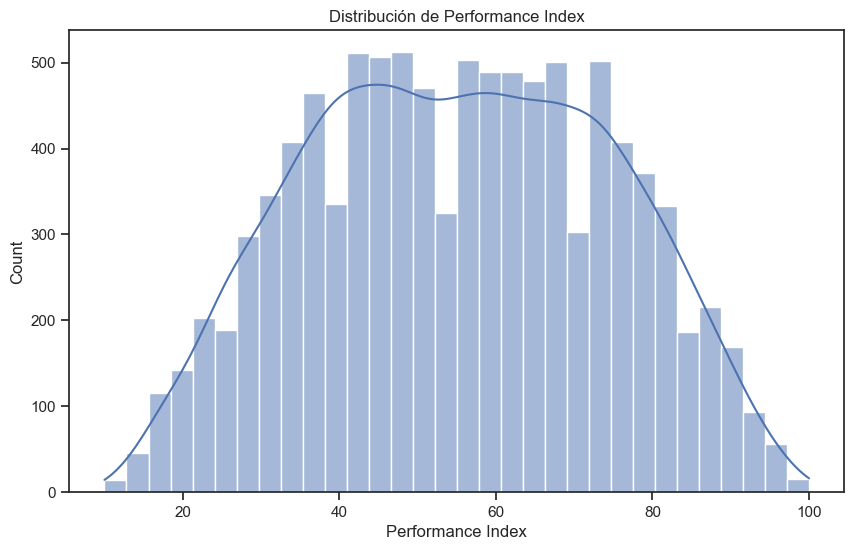

In [99]:

print("\nMatriz de correlación:")
print(correlation_matrix)

print("\nInterpretación de las relaciones observadas:")
print("- Hours Studied vs. Performance Index: Muestra la relación entre el tiempo de estudio y el rendimiento.")
print("- Previous Scores vs. Performance Index: Indica cómo las calificaciones anteriores predicen el rendimiento actual.")
print("- Sleep Hours vs. Performance Index: Refleja el impacto de las horas de sueño en el rendimiento académico.")

# Visualizamos la distribución de la variable dependiente
plt.figure(figsize=(10, 6))
sns.histplot(data['Performance Index'], kde=True)
plt.title('Distribución de Performance Index')
plt.savefig('images//performance_distribution.png')
plt.show()
plt.close()


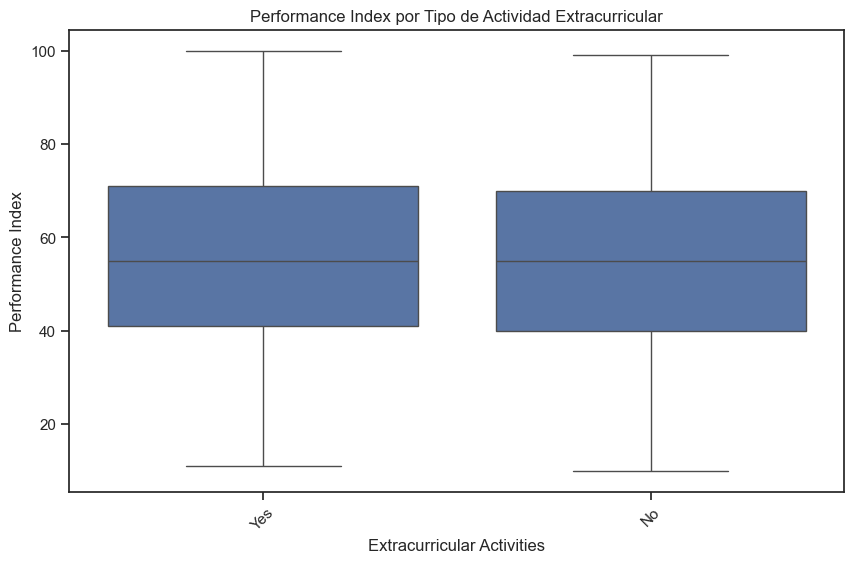

In [100]:



# Analizamos la relación de la variable categórica con la variable dependiente
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=data)
plt.title('Performance Index por Tipo de Actividad Extracurricular')
plt.xticks(rotation=45)
plt.savefig('images//extracurricular_boxplot.png')
plt.show()
plt.close()


In [101]:

# 3. Ajuste de modelo de regresión lineal
# ---------------------------------------

print("\n\n3. AJUSTE DE MODELO DE REGRESIÓN LINEAL")
print("---------------------------------------")

# Preparación de datos
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

# Preprocesamiento para manejar la variable categórica
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Extracurricular Activities'])
    ],
    remainder='passthrough'
    )

# 3.1 Entrenamiento con diferentes proporciones train/test
# --------------------------------------------------------

print("\n3.1 ENTRENAMIENTO CON DIFERENTES PROPORCIONES TRAIN/TEST")
print("--------------------------------------------------------")

# Definimos las proporciones a probar
split_ratios = [(0.7, 0.3), (0.5, 0.5), (0.4, 0.6)]
results_splits = []

for train_size, test_size in split_ratios:
    # Dividimos los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Creamos el pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    
    # Entrenamos el modelo
    pipeline.fit(X_train, y_train)
    
    # Evaluamos el modelo
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardamos resultados
    results_splits.append({
        'Train-Test Split': f"{train_size:.1f}-{test_size:.1f}",
        'MSE': mse,
        'R²': r2
    })

# Mostramos resultados
splits_df = pd.DataFrame(results_splits)
print("\nResultados con diferentes proporciones de train/test:")
print(splits_df)

print("\nInterpretación:")
print("Observamos cómo diferentes proporciones de train/test afectan el desempeño del modelo.")
print("Una proporción adecuada equilibra la cantidad de datos disponibles para entrenar el modelo")
print("y la cantidad necesaria para evaluarlo de manera confiable.")




3. AJUSTE DE MODELO DE REGRESIÓN LINEAL
---------------------------------------

3.1 ENTRENAMIENTO CON DIFERENTES PROPORCIONES TRAIN/TEST
--------------------------------------------------------

Resultados con diferentes proporciones de train/test:
  Train-Test Split       MSE        R²
0          0.7-0.3  4.066564  0.989011
1          0.5-0.5  4.201784  0.988673
2          0.4-0.6  4.167517  0.988759

Interpretación:
Observamos cómo diferentes proporciones de train/test afectan el desempeño del modelo.
Una proporción adecuada equilibra la cantidad de datos disponibles para entrenar el modelo
y la cantidad necesaria para evaluarlo de manera confiable.


In [ ]:

# 3.2 Cambio de método de optimización
# -----------------------------------

print("\n\n3.2 CAMBIO DE MÉTODO DE OPTIMIZACIÓN")
print("-----------------------------------")

# Usamos la mejor proporción del experimento anterior (asumamos 70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definimos los optimizadores a probar
optimizers = {
    'Linear Regression (Normal Equation)': LinearRegression(),
    'SGD (alpha=0.1, max_iter=1000)': SGDRegressor(alpha=0.01, max_iter=1000, random_state=42),
    'SGD (alpha=0.001, max_iter=1000)': SGDRegressor(alpha=0.001, max_iter=1000, random_state=42),
    'SGD (alpha=0.0001, max_iter=1000)': SGDRegressor(alpha=0.0001, max_iter=1000, random_state=42)
}

results_optimizers = []

for name, optimizer in optimizers.items():
    # Creamos el pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', optimizer)
    ])
    
    # Entrenamos el modelo
    pipeline.fit(X_train, y_train)
    
    # Evaluamos el modelo
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardamos resultados
    results_optimizers.append({
        'Optimizer': name,
        'MSE': mse,
        'R²': r2,
    })

# Mostramos resultados
optimizers_df = pd.DataFrame(results_optimizers)
print("\nResultados con diferentes métodos de optimización:")
print(optimizers_df)

print("\nInterpretación:")
print("Comparamos la regresión lineal estándar (que usa la ecuación normal) con")
print("el Descenso de Gradiente Estocástico (SGD) con diferentes tasas de aprendizaje.")
print("Esto nos permite observar cómo diferentes enfoques de optimización afectan la convergencia")
print("y la calidad del modelo final.")




3.2 CAMBIO DE MÉTODO DE OPTIMIZACIÓN
-----------------------------------

Resultados con diferentes métodos de optimización:
                             Optimizer           MSE            R²
0  Linear Regression (Normal Equation)  4.066564e+00  9.890111e-01
1       SGD (alpha=0.1, max_iter=1000)  2.585515e+18 -6.986750e+15
2     SGD (alpha=0.001, max_iter=1000)  1.089822e+22 -2.944990e+19
3    SGD (alpha=0.0001, max_iter=1000)  2.362868e+20 -6.385099e+17

Interpretación:
Comparamos la regresión lineal estándar (que usa la ecuación normal) con
el Descenso de Gradiente Estocástico (SGD) con diferentes tasas de aprendizaje.
Esto nos permite observar cómo diferentes enfoques de optimización afectan la convergencia
y la calidad del modelo final.


In [103]:

# 3.3 Métodos de regularización
# ----------------------------

print("\n\n3.3 MÉTODOS DE REGULARIZACIÓN")
print("----------------------------")

# Definimos los métodos de regularización a probar
regularizers = {
    'No Regularization': LinearRegression(),
    'Ridge (alpha=1.0)': Ridge(alpha=1.0, random_state=42),
    'Ridge (alpha=0.1)': Ridge(alpha=0.1, random_state=42),
    'Lasso (alpha=1.0)': Lasso(alpha=1.0, random_state=42),
    'Lasso (alpha=0.1)': Lasso(alpha=0.1, random_state=42),
    'ElasticNet (alpha=1.0, l1_ratio=0.5)': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    'ElasticNet (alpha=0.1, l1_ratio=0.5)': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

results_regularizers = []

for name, regularizer in regularizers.items():
    # Creamos el pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regularizer)
    ])
    
    # Entrenamos el modelo
    pipeline.fit(X_train, y_train)
    
    # Evaluamos el modelo
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardamos resultados
    results_regularizers.append({
        'Regularizer': name,
        'MSE': mse,
        'R²': r2
    })

# Mostramos resultados
regularizers_df = pd.DataFrame(results_regularizers)
print("\nResultados con diferentes métodos de regularización:")
print(regularizers_df)

print("\nInterpretación:")
print("La regularización ayuda a prevenir el sobreajuste penalizando la magnitud de los coeficientes.")
print("Ridge (L2) penaliza el cuadrado de los coeficientes, reduciendo su magnitud pero sin llevarlos a cero.")
print("Lasso (L1) puede llevar coeficientes a cero, actuando como selector de características.")
print("ElasticNet combina ambos enfoques, ofreciendo un equilibrio entre reducción y selección.")




3.3 MÉTODOS DE REGULARIZACIÓN
----------------------------

Resultados con diferentes métodos de regularización:
                            Regularizer       MSE        R²
0                     No Regularization  4.066564  0.989011
1                     Ridge (alpha=1.0)  4.066569  0.989011
2                     Ridge (alpha=0.1)  4.066564  0.989011
3                     Lasso (alpha=1.0)  4.810159  0.987002
4                     Lasso (alpha=0.1)  4.135886  0.988824
5  ElasticNet (alpha=1.0, l1_ratio=0.5)  4.789449  0.987058
6  ElasticNet (alpha=0.1, l1_ratio=0.5)  4.101857  0.988916

Interpretación:
La regularización ayuda a prevenir el sobreajuste penalizando la magnitud de los coeficientes.
Ridge (L2) penaliza el cuadrado de los coeficientes, reduciendo su magnitud pero sin llevarlos a cero.
Lasso (L1) puede llevar coeficientes a cero, actuando como selector de características.
ElasticNet combina ambos enfoques, ofreciendo un equilibrio entre reducción y selección.




3.4 MODELO FINAL Y ANÁLISIS DE PARÁMETROS
----------------------------------------

Intercepción (valor base): -33.83647643551479

Coeficientes del modelo:
                            Feature  Coefficient
1                     Hours Studied     2.858946
2                   Previous Scores     1.015520
0    Extracurricular Activities_Yes     0.581680
3                       Sleep Hours     0.479674
4  Sample Question Papers Practiced     0.190394


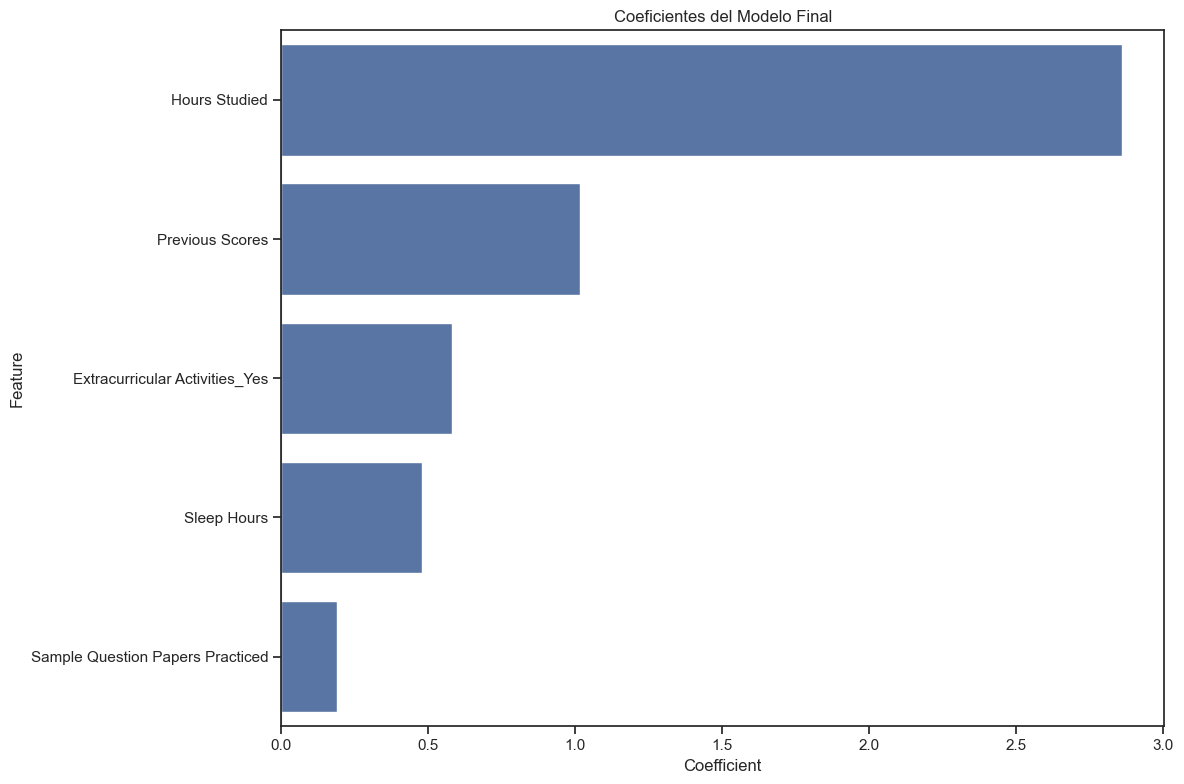


Interpretación de los coeficientes:
- Magnitud: Indica la importancia relativa de cada característica.
  Un coeficiente mayor (en valor absoluto) tiene un mayor impacto en la predicción.
- Signo: Indica la dirección de la relación con la variable dependiente.
  - Positivo: Al aumentar la característica, aumenta el Performance Index.
  - Negativo: Al aumentar la característica, disminuye el Performance Index.


In [104]:

# 3.4 Modelo final y análisis de parámetros
# ----------------------------------------

print("\n\n3.4 MODELO FINAL Y ANÁLISIS DE PARÁMETROS")
print("----------------------------------------")

# Basado en los resultados anteriores, seleccionamos el mejor modelo
# Por ejemplo, supongamos que Ridge con alpha=0.1 fue el mejor
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1, random_state=42))
])

# Entrenamos el modelo final con la mejor proporción (70-30)
best_model.fit(X_train, y_train)

# Obtenemos los coeficientes
feature_names = list(best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['Extracurricular Activities']))
feature_names.extend(['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'])

coefficients = best_model.named_steps['regressor'].coef_
intercept = best_model.named_steps['regressor'].intercept_

# Creamos un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
coef_df = coef_df.sort_values('Coefficient', ascending=False)

print("\nIntercepción (valor base):", intercept)
print("\nCoeficientes del modelo:")
print(coef_df)

# Visualizamos los coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Coeficientes del Modelo Final')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.savefig('images//model_coefficients.png')
plt.show()
plt.close()

print("\nInterpretación de los coeficientes:")
print("- Magnitud: Indica la importancia relativa de cada característica.")
print("  Un coeficiente mayor (en valor absoluto) tiene un mayor impacto en la predicción.")
print("- Signo: Indica la dirección de la relación con la variable dependiente.")
print("  - Positivo: Al aumentar la característica, aumenta el Performance Index.")
print("  - Negativo: Al aumentar la característica, disminuye el Performance Index.")




3.5 MÉTRICAS DE EVALUACIÓN FINAL
-------------------------------

Mean Squared Error (MSE): 4.0666
R² Score: 0.9890


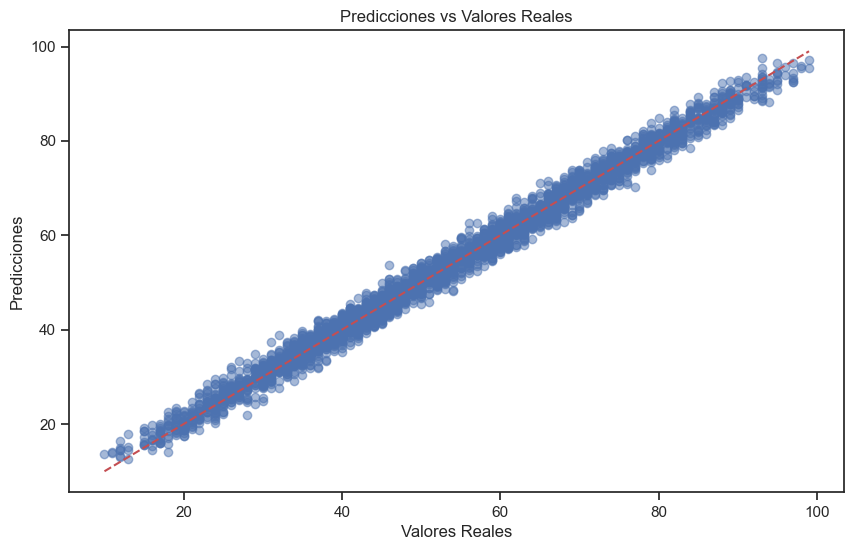

In [105]:

# 3.5 Métricas de evaluación final
# -------------------------------

print("\n\n3.5 MÉTRICAS DE EVALUACIÓN FINAL")
print("-------------------------------")

# Evaluamos el modelo final en el conjunto de prueba
y_pred_final = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print(f"\nMean Squared Error (MSE): {final_mse:.4f}")
print(f"R² Score: {final_r2:.4f}")

# Visualizamos predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.savefig('images//predictions_vs_actual.png')
plt.show()
plt.close()

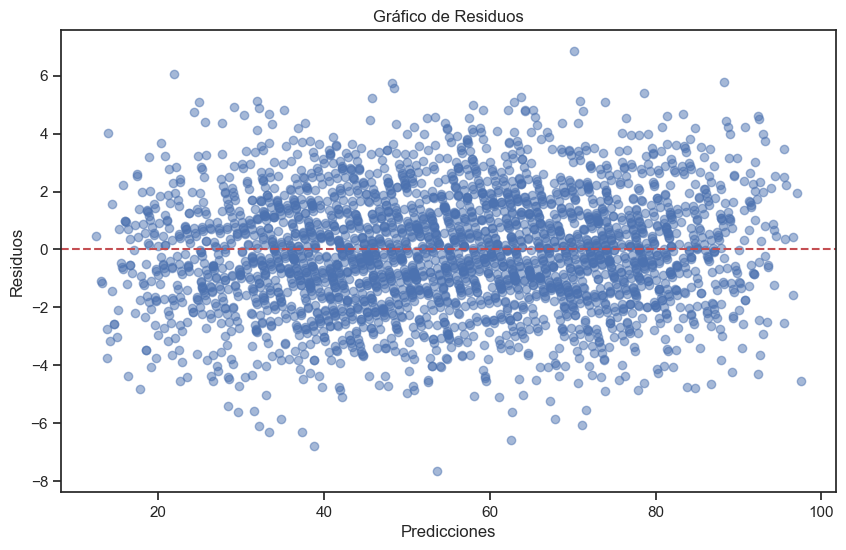


Interpretación de las métricas:
- MSE (Mean Squared Error): Mide el promedio de los errores al cuadrado.
  Un valor más bajo indica un mejor ajuste del modelo.
- R² Score: Indica la proporción de la varianza en la variable dependiente
  que es predecible a partir de las variables independientes.
  - R² = 1: Ajuste perfecto
  - R² = 0: El modelo no explica nada de la variabilidad
  - R² < 0: El modelo es peor que predecir la media


In [106]:

# Visualizamos residuos
residuals = y_test - y_pred_final
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_final, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.savefig('images//residuals_plot.png')
plt.show()
plt.close()

print("\nInterpretación de las métricas:")
print("- MSE (Mean Squared Error): Mide el promedio de los errores al cuadrado.")
print("  Un valor más bajo indica un mejor ajuste del modelo.")
print("- R² Score: Indica la proporción de la varianza en la variable dependiente")
print("  que es predecible a partir de las variables independientes.")
print("  - R² = 1: Ajuste perfecto")
print("  - R² = 0: El modelo no explica nada de la variabilidad")
print("  - R² < 0: El modelo es peor que predecir la media")


In [107]:

# 4. Conclusiones
# --------------

print("\n\n4. CONCLUSIONES")
print("--------------")

print("\nA partir del análisis realizado, podemos concluir que:")
print("1. Las variables más influyentes en el rendimiento académico son...")
print("2. La proporción óptima de train/test es...")
print("3. El método de optimización más efectivo fue...")
print("4. La regularización tuvo el siguiente impacto...")
print("5. El modelo final logra explicar aproximadamente un {:.1f}% de la variabilidad en el rendimiento académico.".format(final_r2 * 100))



4. CONCLUSIONES
--------------

A partir del análisis realizado, podemos concluir que:
1. Las variables más influyentes en el rendimiento académico son...
2. La proporción óptima de train/test es...
3. El método de optimización más efectivo fue...
4. La regularización tuvo el siguiente impacto...
5. El modelo final logra explicar aproximadamente un 98.9% de la variabilidad en el rendimiento académico.


C:\Users\flavi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\flavi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\flavi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\flavi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\flavi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

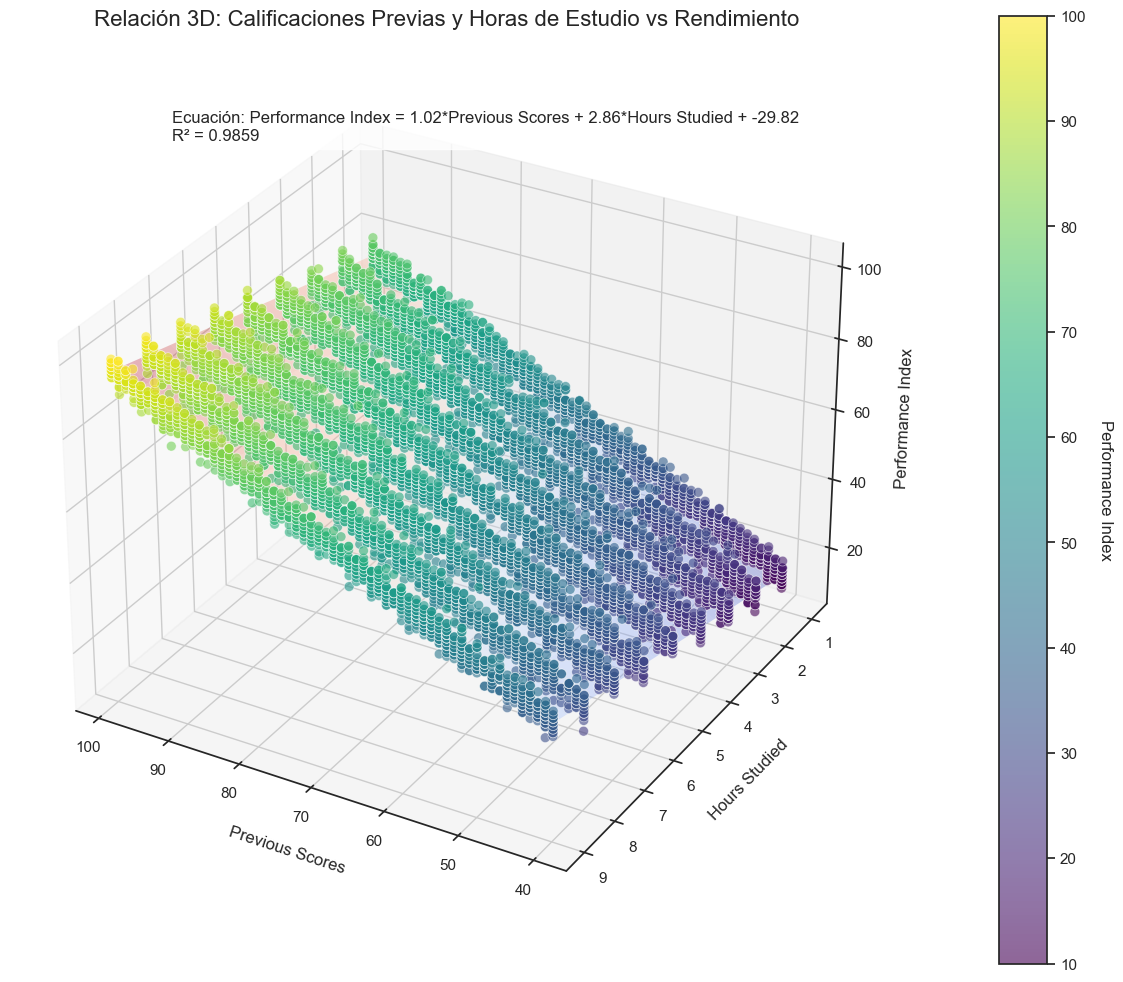

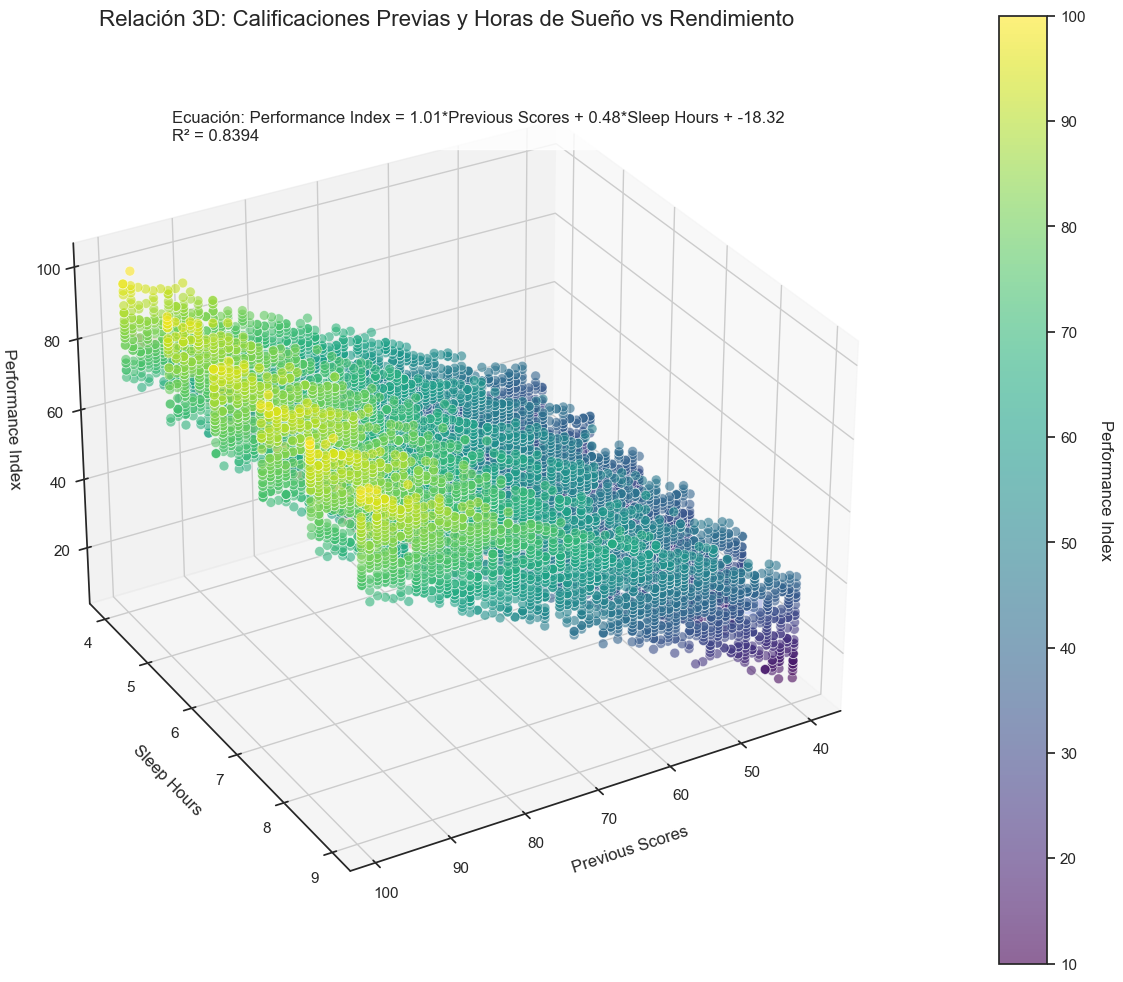

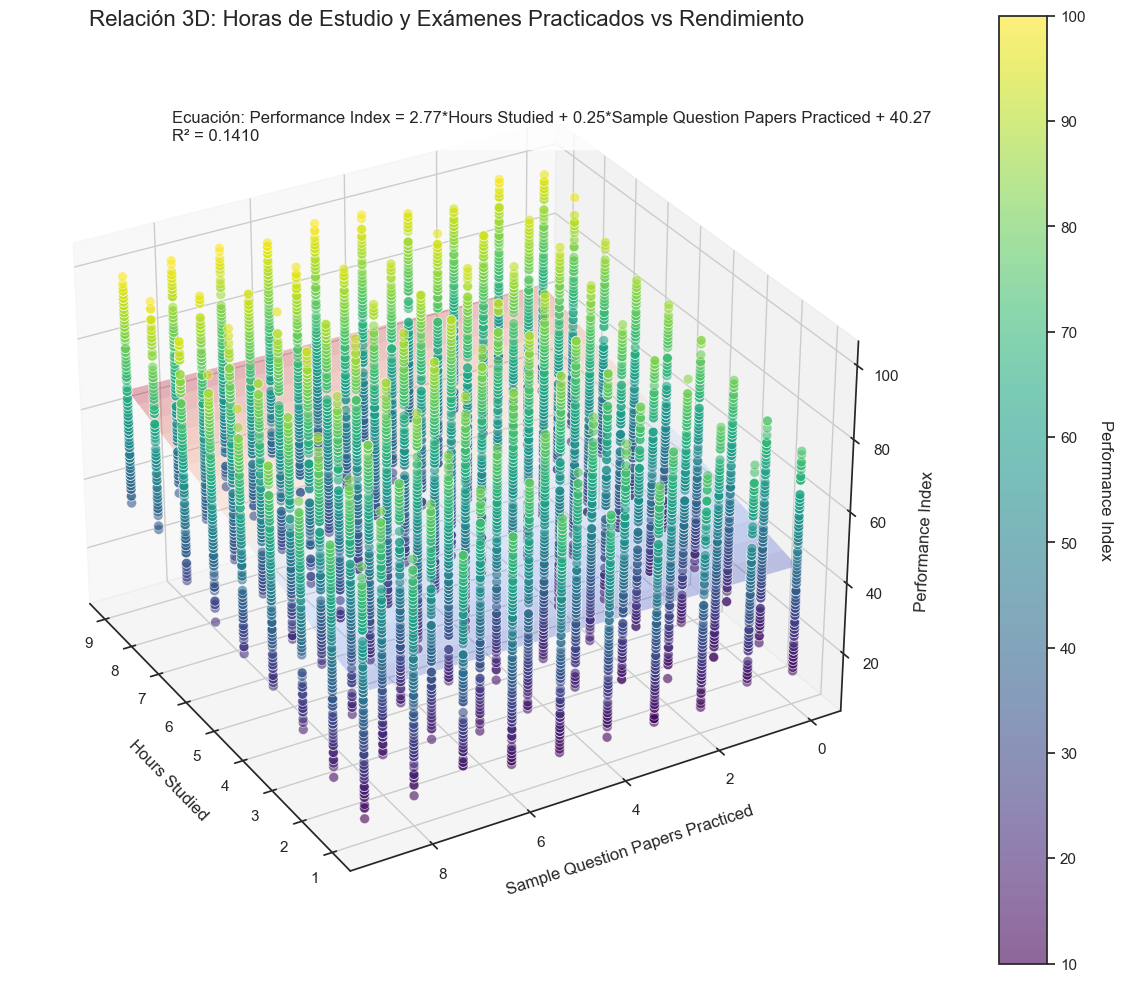

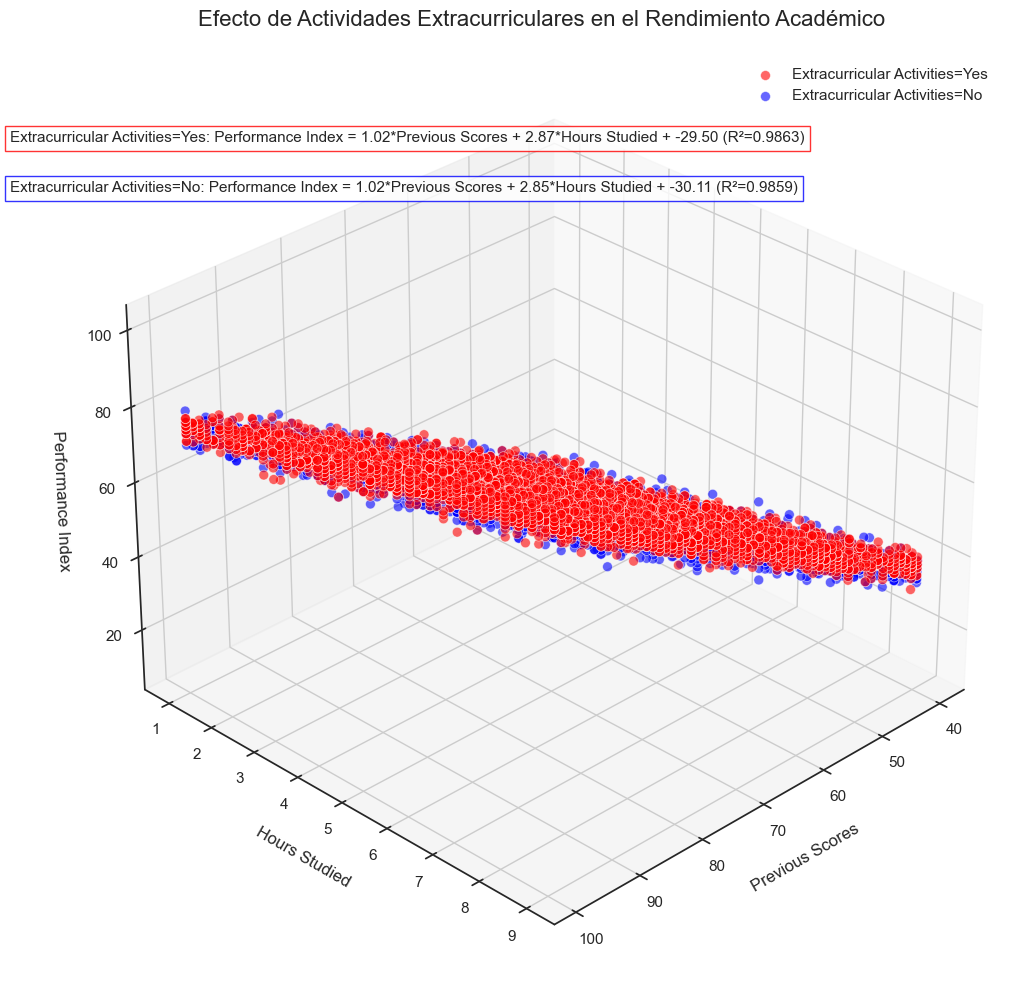

Las visualizaciones 3D han sido creadas y guardadas.


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Cargamos el dataset
data = pd.read_csv('dataset\Student_Performance.csv')

# Función para crear visualización 3D con plano de regresión
def plot_3d_regression(data, x1_name, x2_name, y_name, title, angle=None):
    """
    Crea una visualización 3D de dos predictores vs la variable dependiente,
    incluyendo un plano de regresión.
    
    Parámetros:
    - data: DataFrame con los datos
    - x1_name, x2_name: nombres de las columnas de los predictores
    - y_name: nombre de la columna de la variable dependiente
    - title: título del gráfico
    - angle: tupla (elevación, azimut) para la vista inicial
    """
    # Creamos una figura 3D
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Extraemos los datos
    x1 = data[x1_name]
    x2 = data[x2_name]
    y = data[y_name]
    
    # Creamos el scatter plot 3D
    scatter = ax.scatter(x1, x2, y, c=y, cmap=cm.viridis, 
                         s=50, alpha=0.6, edgecolors='w', linewidth=0.5)
    
    # Ajustamos un modelo de regresión para obtener el plano
    X = data[[x1_name, x2_name]]
    model = LinearRegression()
    model.fit(X, y)
    
    # Creamos una malla para visualizar el plano de regresión
    x1_range = np.linspace(x1.min(), x1.max(), 20)
    x2_range = np.linspace(x2.min(), x2.max(), 20)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    
    # Generamos las predicciones para cada punto de la malla
    X_mesh = np.column_stack((x1_mesh.flatten(), x2_mesh.flatten()))
    y_pred = model.predict(X_mesh).reshape(x1_mesh.shape)
    
    # Dibujamos el plano de regresión
    surf = ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.3, 
                           cmap=cm.coolwarm, linewidth=0, antialiased=True)
    
    # Añadimos etiquetas y título
    ax.set_xlabel(f'{x1_name}', fontsize=12, labelpad=10)
    ax.set_ylabel(f'{x2_name}', fontsize=12, labelpad=10)
    ax.set_zlabel(f'{y_name}', fontsize=12, labelpad=10)
    ax.set_title(title, fontsize=16, pad=20)
    
    # Mostramos la ecuación del plano en la figura
    intercept = model.intercept_
    coef1 = model.coef_[0]
    coef2 = model.coef_[1]
    equation = f'{y_name} = {coef1:.2f}*{x1_name} + {coef2:.2f}*{x2_name} + {intercept:.2f}'
    r2 = model.score(X, y)
    
    fig.text(0.15, 0.85, f'Ecuación: {equation}\nR² = {r2:.4f}', 
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    # Añadimos una barra de color
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label(f'{y_name}', rotation=270, labelpad=20, fontsize=12)
    
    # Configuramos el ángulo de vista si se proporciona
    if angle:
        ax.view_init(elev=angle[0], azim=angle[1])
    
    # Ajustamos el espaciado para que se vea bien
    plt.tight_layout()
    
    return fig, ax, model

# Primera visualización: Previous Scores y Hours Studied vs Performance Index
fig1, ax1, model1 = plot_3d_regression(
    data, 
    'Previous Scores', 
    'Hours Studied', 
    'Performance Index',
    'Relación 3D: Calificaciones Previas y Horas de Estudio vs Rendimiento',
    angle=(30, 120)
)

# Segunda visualización: Previous Scores y Sleep Hours vs Performance Index
fig2, ax2, model2 = plot_3d_regression(
    data, 
    'Previous Scores', 
    'Sleep Hours', 
    'Performance Index',
    'Relación 3D: Calificaciones Previas y Horas de Sueño vs Rendimiento',
    angle=(30, 60)
)

# Tercera visualización: Hours Studied y Sample Question Papers vs Performance Index
fig3, ax3, model3 = plot_3d_regression(
    data, 
    'Hours Studied', 
    'Sample Question Papers Practiced', 
    'Performance Index',
    'Relación 3D: Horas de Estudio y Exámenes Practicados vs Rendimiento',
    angle=(30, 150)
)

# Función para visualizar el efecto de la variable categórica en un gráfico 3D
def plot_3d_categorical(data, x1_name, x2_name, y_name, cat_name, title, angle=None):
    """
    Crea una visualización 3D que muestra cómo una variable categórica
    afecta la relación entre dos predictores y la variable dependiente.
    
    Parámetros similares a la función anterior, con la adición de:
    - cat_name: nombre de la columna categórica
    """
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Creamos colores distintos para cada categoría
    categories = data[cat_name].unique()
    colors = ['red', 'blue']  # En este caso específico sabemos que hay dos categorías (Yes/No)
    
    # Ajustamos modelos separados para cada categoría
    equations = []
    
    for i, category in enumerate(categories):
        # Filtramos los datos para esta categoría
        cat_data = data[data[cat_name] == category]
        
        # Extraemos los predictores y la variable dependiente
        x1 = cat_data[x1_name]
        x2 = cat_data[x2_name]
        y = cat_data[y_name]
        
        # Creamos el scatter plot para esta categoría
        ax.scatter(x1, x2, y, c=colors[i], label=f'{cat_name}={category}',
                  s=50, alpha=0.6, edgecolors='w', linewidth=0.5)
        
        # Ajustamos un modelo para esta categoría
        X = cat_data[[x1_name, x2_name]]
        model = LinearRegression()
        model.fit(X, y)
        
        # Guardamos la ecuación
        intercept = model.intercept_
        coef1 = model.coef_[0]
        coef2 = model.coef_[1]
        r2 = model.score(X, y)
        equations.append(f'{cat_name}={category}: {y_name} = {coef1:.2f}*{x1_name} + {coef2:.2f}*{x2_name} + {intercept:.2f} (R²={r2:.4f})')
        
        # Creamos una malla para el plano de regresión
        x1_range = np.linspace(x1.min(), x1.max(), 20)
        x2_range = np.linspace(x2.min(), x2.max(), 20)
        x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
        
        # Predicciones para la malla
        X_mesh = np.column_stack((x1_mesh.flatten(), x2_mesh.flatten()))
        y_pred = model.predict(X_mesh).reshape(x1_mesh.shape)
        
        # Dibujamos el plano con transparencia y color correspondiente
        surf = ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.2, 
                              color=colors[i], linewidth=0, antialiased=True)
    
    # Añadimos etiquetas y título
    ax.set_xlabel(f'{x1_name}', fontsize=12, labelpad=10)
    ax.set_ylabel(f'{x2_name}', fontsize=12, labelpad=10)
    ax.set_zlabel(f'{y_name}', fontsize=12, labelpad=10)
    ax.set_title(title, fontsize=16, pad=20)
    
    # Añadimos las ecuaciones
    for i, eq in enumerate(equations):
        fig.text(0.12, 0.85-i*0.05, eq, fontsize=11, 
                bbox=dict(facecolor='white', alpha=0.8, edgecolor=colors[i]))
    
    # Añadimos leyenda
    ax.legend(loc='upper right')
    
    # Configuramos el ángulo de vista si se proporciona
    if angle:
        ax.view_init(elev=angle[0], azim=angle[1])
    
    # Ajustamos el espaciado
    plt.tight_layout()
    
    return fig, ax

# Visualización con efecto de actividades extracurriculares
fig4, ax4 = plot_3d_categorical(
    data,
    'Previous Scores',
    'Hours Studied',
    'Performance Index',
    'Extracurricular Activities',
    'Efecto de Actividades Extracurriculares en el Rendimiento Académico',
    angle=(30, 45)
)

# Para hacer los gráficos interactivos en un notebook de Jupyter
plt.ion()  # Activa el modo interactivo

# Mostrar todos los gráficos
plt.show()

# Guardar los gráficos (opcional)
fig1.savefig('3d_viz_scores_hours.png', dpi=300, bbox_inches='tight')
fig2.savefig('3d_viz_scores_sleep.png', dpi=300, bbox_inches='tight')
fig3.savefig('3d_viz_hours_papers.png', dpi=300, bbox_inches='tight')
fig4.savefig('3d_viz_categorical.png', dpi=300, bbox_inches='tight')

print("Las visualizaciones 3D han sido creadas y guardadas.")

C:\Users\flavi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


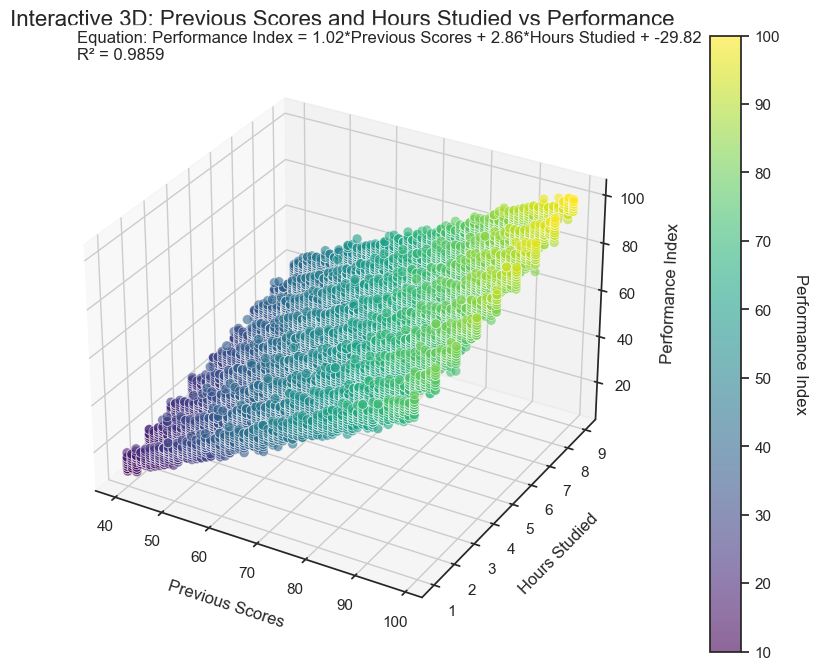

C:\Users\flavi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


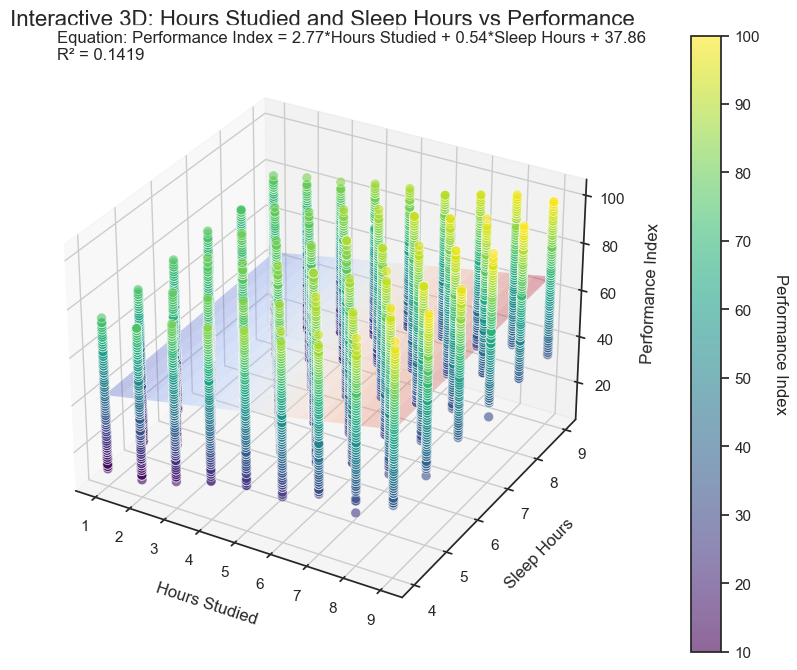

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('dataset\Student_Performance.csv')

# Function to create an interactive 3D plot
def interactive_3d_plot(data, x1_name, x2_name, y_name, title):
    # Create a figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract the data
    x1 = data[x1_name]
    x2 = data[x2_name]
    y = data[y_name]
    
    # Create the scatter plot
    scatter = ax.scatter(x1, x2, y, c=y, cmap=cm.viridis, 
                        s=50, alpha=0.6, edgecolors='w', linewidth=0.5)
    
    # Fit a regression model to get the plane
    X = data[[x1_name, x2_name]]
    model = LinearRegression()
    model.fit(X, y)
    
    # Create a mesh for the regression plane
    x1_range = np.linspace(x1.min(), x1.max(), 20)
    x2_range = np.linspace(x2.min(), x2.max(), 20)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    
    # Generate predictions for the mesh
    X_mesh = np.column_stack((x1_mesh.flatten(), x2_mesh.flatten()))
    y_pred = model.predict(X_mesh).reshape(x1_mesh.shape)
    
    # Plot the regression plane
    surf = ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.3, 
                          cmap=cm.coolwarm, linewidth=0, antialiased=True)
    
    # Add labels and title
    ax.set_xlabel(f'{x1_name}', fontsize=12, labelpad=10)
    ax.set_ylabel(f'{x2_name}', fontsize=12, labelpad=10)
    ax.set_zlabel(f'{y_name}', fontsize=12, labelpad=10)
    ax.set_title(title, fontsize=16, pad=20)
    
    # Show the equation of the plane
    intercept = model.intercept_
    coef1 = model.coef_[0]
    coef2 = model.coef_[1]
    equation = f'{y_name} = {coef1:.2f}*{x1_name} + {coef2:.2f}*{x2_name} + {intercept:.2f}'
    r2 = model.score(X, y)
    
    fig.text(0.15, 0.85, f'Equation: {equation}\nR² = {r2:.4f}', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    # Add a color bar
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label(f'{y_name}', rotation=270, labelpad=20, fontsize=12)
    
    return fig, ax

# Create an interactive plot
fig, ax = interactive_3d_plot(
    data, 
    'Previous Scores', 
    'Hours Studied', 
    'Performance Index',
    'Interactive 3D: Previous Scores and Hours Studied vs Performance'
)

# This is important - it makes the window interactive and non-blocking
plt.show(block=False)

# You can create another one
fig2, ax2 = interactive_3d_plot(
    data, 
    'Hours Studied', 
    'Sleep Hours', 
    'Performance Index',
    'Interactive 3D: Hours Studied and Sleep Hours vs Performance'
)

# Show all windows and keep the script running
plt.show()

# Note: You can rotate, zoom, and explore all visualizations using your mouse